## Géométrie et espaces de formes - TP 1


## 1. Noyaux reproduisants et interpolation


### Noyaux reproduisants

Soit $H$ un espace de Hilbert de fonctions $f:{\mathbb R}^d\rightarrow{\mathbb R}$. $H$ est un espace à noyau reproduisant s'il existe une fonction
$K_H:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ telle que $\forall x\in{\mathbb R}^d, K_H(\cdot,x)\in H$, et 

$$ \forall f\in H,\quad\forall x\in{\mathbb R}^d,\quad f(x)=\langle{K_H(\cdot,x)},f\rangle_H.$$

$K_H$ est alors défini de façon unique et est appelé noyau reproduisant de $H$. On peut remarquer que l'on a la propriété suivante (propriété reproduisante) :

$$\forall x,y\in{\mathbb R}^d,\quad \langle K_H(\cdot,x),K_H(\cdot,y)\rangle_H=K_H(x,y).$$

Inversement, il est possible, à partir d'une fonction $K:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ de type positif, de construire l'unique espace de Hilbert $H$ de fonctions tel que $K_H=K$.

### Un premier exemple : espace de Sobolev $H^1({\mathbb R})$

L'espace de Sobolev $H^1({\mathbb R})$ est l'espace des fonctions de $L^2({\mathbb R})$ dont la dérivée au sens faible appartient aussi à $L^2({\mathbb R})$. En fait tout élément de $H^1({\mathbb R})$ admet un représentant continu et on peut aussi définir $H^1({\mathbb R})$
de façon classique comme l'espace des fonctions $f:{\mathbb R}\rightarrow{\mathbb R}$ continues, de carré intégrable, dérivables presque partout et telles que $\int_x^yf'(t)dt=f(y)-f(x)$ pour tous réels $x,y$. Sur cet espace on définit habituellement le produit scalaire
$$\langle f,g\rangle_{H^1} = \int_{\mathbb R} f(t)g(t)+f'(t)g'(t)\;dt,$$
mais on peut aussi définir plus généralement pour une échelle $\sigma>0$ fixée,
$$\langle f, g\rangle_{H^1_\sigma} = \int_{\mathbb R} f(t)g(t)+\sigma^2f'(t)g'(t)\;dt.$$
On note $H^1_\sigma$ l'espace $H^1({\mathbb R})$ muni de ce produit scalaire. C'est un espace de Hilbert.

__Question 1__ : Montrer que $H^1_\sigma$ est un espace à noyau reproduisant dont le noyau est la fonction $K_\sigma:{\mathbb R}^2\rightarrow{\mathbb R}$ définie par

$$\forall x,y\in{\mathbb R},\quad K_\sigma(x,y)=\frac1{2\sigma}e^{-\frac{|x-y|}\sigma}.$$

<font color =blue> **Réponse 1:** 
- On sait déjà $H^1_\sigma$ muni du produit scalaire $\langle \ , \ \rangle_{H^1_\sigma}$ est un espace de Hilbert
- Pour $x \in \mathbb{R}$, on définit $K_x : y \in \mathbb{R} \mapsto K_{\sigma}(x,y)$. La fonction $\rho: t \in \mathbb{R} \mapsto exp(-|t|)$ est dérivable (au sens fort) en tout réél sauf en $0$. Donc, $K_x$ est dérivable presque partout et $\forall y \in \mathbb{R}, K_x^{'}(y) = \frac{-1}{2\sigma^2} sgn(x-y)e^{\frac{-|x-y|}{\sigma}}$. On a que $K_x \in L^2(\mathbb{R})$ car $\int_{\mathbb{R}}K_x(y)^2 dy = \frac{1}{4\sigma^2}\int_{\mathbb{R}} exp(\frac{-2|x-y|}{\sigma})dy = \frac{1}{4\sigma}$. De plus, $K_x' \in L^2(\mathbb{R})$ puisque $|K_x^{'}| = \frac{1}{2\sigma^2} K_x$. Ainsi, $K_x \in H^1_\sigma$.
- Soit $x \in \mathbb{R}$ et $f \in H^1_{\sigma}$.
\begin{equation}
\begin{split}
\langle f, K_x \rangle_{H^1_\sigma} &= \int_{\mathbb{R}}f(t)K_x(t)+\sigma^2f'(t)K_x^{'}(t)dt \\
&= \frac{1}{2\sigma}\left(\int_{-\infty}^xf(t)e^{\frac{t-x}{\sigma}}+\sigma f'(t)e^{\frac{t-x}{\sigma}}dt + \int_{x}^{+\infty}f(t)e^{\frac{x-t}{\sigma}}-\sigma f'(t)e^{\frac{x-t}{\sigma}}dt \right)\\
&=\frac{1}{2\sigma}\left( \left[\sigma e^{\frac{t-x}{\sigma}} f(t)\right]_{-\infty}^x + \left[-\sigma e^{\frac{x-t}{\sigma}} f(t)\right]_x^{+\infty}\right)\\
&= f(x) 
\end{split}
\end{equation}
Donc, la propriété reproduisante est vérifiée.\
Par conséquent, <font color=red> $H^1_\sigma$  est un espace à noyau reproduisant dont le noyau est la fonction $K_\sigma$

__Question 2__ : Vérifier numériquement la propriété du noyau : choisir par exemple $\sigma=2$, une fonction $f\in H^1_\sigma$ quelconque (par exemple $f(x)=e^{-x^2}$), un réel $x\in{\mathbb R}$ quelconque, puis calculer une valeur approchée de $\langle f, {K_\sigma(\cdot,x)}\rangle_{H^1_\sigma}$ par sommes et différences finies et comparer avec $f(x)$. Vérifier également numériquement la propriété reproduisante.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
from mpl_toolkits.mplot3d import Axes3D

# fonction pour définir le noyau 
def KH1(x,y,sigma=1):
	return np.exp(- abs(x - y) / sigma) / (2*sigma)


# fonction pour définir le produit scalaire
def H1ScalProd(f,g,sigma=1):
	# f et g sont deux fonctions python
	# doit renvoyer <f,g>_H1 calculé par sommes et différences finies
	x = np.linspace(-15*sigma, 15*sigma, 20000)
	dx = x[1:] - x[:-1]
	fx, gx = f(x), g(x)
	mfx, mgx = 0.5*(fx[1:] + fx[:-1]), 0.5*(gx[1:] + gx[:-1])
	dfx, dgx = fx[1:] - fx[:-1], gx[1:] - gx[:-1]
	return mfx.dot(mgx * dx) + sigma**2 * dfx.dot(dgx / dx)

# définition des paramètres et fonctions à tester    
sigma = 2
x0 = 2
f = lambda x: np.exp(-x**2)
Kx = lambda y: KH1(y, x0, sigma)

# test : valeur du produit scalaire <f,KH1(.,x)>_H1 et comparaison avec f(x)
prod = H1ScalProd(f, Kx, sigma)
fx = f(x0)
print(f"x = {x0} \t sigma = {sigma} \t f(x) = exp(-x^2)")
print("<f,KH1(.,x)>_H1 :", prod)
print("f(x) :", fx)
print("erreur relative :", 2*abs(fx-prod)/(abs(fx) + abs(prod)))

# vérification de la propriété reproduisante : calcul de <KH1(.,y),KH1(.,x)>_H1 et comparaison avec KH1(x,y)
y0 = -1
prod = H1ScalProd(Kx, lambda x: KH1(x, y0, sigma), sigma)
Kxy = KH1(x0, y0, sigma)
print()
print(f"y = {y0}")
print("<KH1(.,y),KH1(.,x)>_H1 :", prod)
print("KH1(x,y) :", Kxy)
print("erreur relative :", 2*abs(Kxy-prod)/(abs(Kxy) + abs(prod)))

x = 2 	 sigma = 2 	 f(x) = exp(-x^2)
<f,KH1(.,x)>_H1 : 0.018315831148639827
f(x) : 0.01831563888873418
erreur relative : 1.0496980080378019e-05

y = -1
<KH1(.,y),KH1(.,x)>_H1 : 0.055782555727487984
KH1(x,y) : 0.055782540037107455
erreur relative : 2.812775881566393e-07


### Problème d'interpolation scalaire

Le noyau $K_H$ permet de résoudre le problème d'interpolation suivant: 

$$\left\{\begin{array}{l}
\text{Minimiser }\left\|f\right\|_H\text{ pour }f\in H, 
\\ \text{sous les contraintes }f(y_i)=c_i,\quad 1\leq i\leq n
\end{array}\right.
$$

où $y_i\in{\mathbb R}^d, c_i\in$ sont fixés. La solution de ce problème est donnée par
$$f^*(x)=\sum_{j=1}^nK_H(x,y_j)a_j,$$
où les $a_j\in{\mathbb R}$ sont solutions du système linéaire

$$\forall i,\quad 1\leq i\leq n,\quad\sum_{j=1}^nK_H(y_i,y_j)a_j=c_i.$$

Ces équations peuvent s'écrire sous forme condensée: notons ${\bf y}=(y_1,\ldots,y_n)\in{\mathbb R}^{dn}, \boldsymbol{a}=(a_1,\ldots,a_n)\in{\mathbb R}^{n}, {\bf c}=(c_1,\ldots,c_n)\in{\mathbb R}^{n}$, et $K_H({\bf y},{\bf y})\in\mathcal{M}_{n}({\mathbb R})$ la matrice des $K_H(y_i,y_j)$ pour $1\leq i,j\leq n$. Le système linéaire à résoudre s'écrit alors

$$K_H({\bf y},{\bf y}){\bf a}={\bf c}.$$

De meme, l'évaluation de la solution $f^*$ en des points $x_i\in{\mathbb R}^d, 1\leq i\leq p$ s'écrit 

$${\bf f}^*({\bf x})=K_H({\bf x},{\bf y}){\bf a},$$

où ${\bf x}=(x_1,\ldots,x_p)\in{\mathbb R}^{dp}$, ${\bf f}^*({\bf x})=(f^*(x_1),\ldots,f^*(x_p))$, et $K_H({\bf x},{\bf y})\in\mathcal{M}_{p,n}({\mathbb R})$ est la matrice des $K_H(x_i,y_j)$ pour $1\leq i\leq p$, $1\leq j\leq n$.\\

<br>
<br>

__Question 3__ : Ecrire une fonction
`KernelMatrix(x,y,h)` qui construit
la matrice $K_H({\bf x},{\bf y})$ pour des points ${\bf x}\in{\mathbb R}^{pd}$, ${\bf y}\in{\mathbb R}^{nd}$ quelconques (supposés entrés sous forme de tableaux $p\times d$ et $n\times d$), et un noyau de la forme $K_H(x,y)=h\left(\|x-y\|\right)$, où $h$ est une fonction scalaire. 

In [2]:
def KernelMatrix(x,y,h):
	p, d1 = x.shape
	n, d2 = y.shape
	assert d1 == d2, (d1, d2)
	return h(np.linalg.norm(x.reshape(p, 1, d1) - y, axis=2))

<br>
Voici un exemple de son utilisation :

In [3]:
import numpy as np
x = np.random.rand(10,2)        # 10 points tirés aléatoirement dans [0,1]^2
y = np.random.rand(15,2)        # 15 points tirés aléatoirement dans [0,1]^2
sigma = 1.5                     # échelle du noyau
def gauss(sigma):
    def f(u):
        return np.exp(-u**2/sigma**2)
    return f
Kxy = KernelMatrix(x,y,gauss(sigma))
print(Kxy)

[[0.81875768 0.96475187 0.987667   0.95178753 0.91445751 0.98015703
  0.92188425 0.75576566 0.91365406 0.96344592 0.86150828 0.87895151
  0.99767473 0.85897188 0.95417606]
 [0.78350658 0.97327352 0.96161301 0.90643661 0.89642906 0.96110236
  0.86306615 0.73385697 0.94800883 0.91839394 0.82221341 0.84695547
  0.9819285  0.90220702 0.95689384]
 [0.99169861 0.71919787 0.8418231  0.95110576 0.97600757 0.94053472
  0.87492539 0.95284518 0.80816983 0.90692129 0.99956503 0.99565163
  0.85043059 0.77352271 0.91773249]
 [0.94292503 0.84842429 0.93982108 0.99036154 0.97953191 0.99198398
  0.93661096 0.88645011 0.87497263 0.97089465 0.97023441 0.97534958
  0.94723409 0.82836299 0.96233126]
 [0.94376014 0.71620727 0.77281208 0.84683451 0.972341   0.91189325
  0.72647605 0.96143194 0.9234581  0.79729621 0.93228104 0.95235268
  0.80899745 0.92435859 0.95856277]
 [0.80493985 0.9082105  0.98763346 0.97610266 0.86795349 0.94586169
  0.99177724 0.71374486 0.78402262 0.99551803 0.85817075 0.85967242
  0.

<br>
<br>

__Question 4__ : Ecrire une fonction
`Interp(x,y,c,h)`
qui résout le problème d'interpolation $f(y_i)=c_i$, $1\leq i\leq n$ et renvoie l'évaluation de la solution aux points $x_i$, $1\leq i\leq p$`

In [4]:
def Interp(x,y,c,h):
    Kyy = KernelMatrix(y, y, h)
    a = np.linalg.solve(Kyy, c)
    Kxy = KernelMatrix(x, y, h)
    fx = Kxy @ a
    return fx

<br>

__Question 5__ : Tester la fonction `Interp` tout d'abord avec $d=1$: 

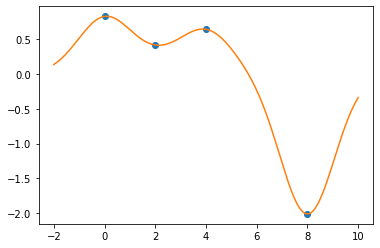

In [5]:
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
fx = Interp(x,y,c,gauss(sigma))         # calcul de l'interpolation

plt.plot(y,c,'o')                       # affichage
plt.plot(x,fx)

<br>
<br>

Tester ensuite le meme problème en changeant l'échelle du noyau : on prendra ainsi $h(u)=e^{-u^2/\sigma^2}$ pour $\sigma\in\{0.2,2,4,10\}$. Afficher sur le meme graphique les différentes solutions. Tester également l'interpolation avec des noyaux de Cauchy : $h(u)=\frac1{1+u^2/\sigma^2}$.

Text(0.5, 1.0, 'Cauchy')

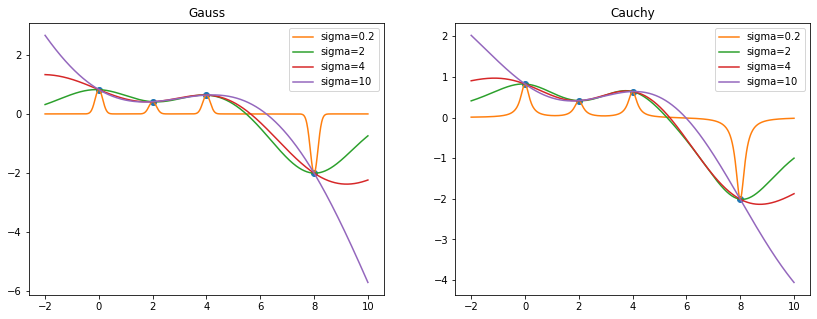

In [6]:
sigmas = [0.2, 2, 4, 10]
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(y, c, 'o')
axs[1].plot(y, c, 'o')
for s in sigmas:
    fx = Interp(x, y, c, gauss(s))
    axs[0].plot(x, fx, label=f"sigma={s}")
    fx = Interp(x, y, c, lambda u: 1/(1 + (u/s)**2))
    axs[1].plot(x, fx, label=f"sigma={s}")
axs[0].legend()
axs[0].set_title("Gauss")
axs[1].legend()
axs[1].set_title("Cauchy")

<br>
<br>

__Question 6__ : Effectuer l'interpolation avec un noyau $K_\sigma$ de la première partie, et vérifier numériquement 
que la norme dans $H^1_\sigma$ de la solution est toujours inférieure à la norme d'autres fonctions de $H^1_\sigma$ passant par les points (par exemple les solutions du problème d'interpolation avec d'autres noyaux).

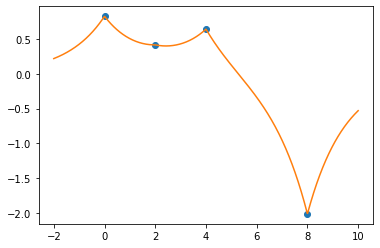

In [7]:
h = lambda u: 0.5 / sigma * np.exp(-u/sigma)
fx = Interp(x, y, c, h)
plt.plot(y, c, 'o')
plt.plot(x, fx)

In [8]:
def normH1(x, fx):
    dx = x[1:] - x[:-1]
    mfx2 = 0.5 * (fx[1:] + fx[:-1])**2 * dx
    dfx2 = (fx[1:] - fx[:-1])**2 / dx
    return mfx2.sum() + dfx2.sum()

In [9]:
fx2 = Interp(x, y, c, gauss(sigma))
no = normH1(x, fx)
no2 = normH1(x, fx2)
print("Norme avec le bon noyau :", no)
print("Norme avec un autre noyau :", no2)

Norme avec le bon noyau : 17.807107356078102
Norme avec un autre noyau : 23.84615482965355


<br>
<br>

__Question 7__ : Tester à présent l'interpolation dans le cas $d=2$: choisir par exemple $10$ points $y_i$ dans $[0,1]^2$ et des réels $c_i$ tirés aléatoirement, puis évaluer sur une grille uniforme de $100*100$ points que l'on construira avec la commande suivante : `X1, X2 = np.meshgrid(t,t)`

In [10]:
def InterpGrid(X1,X2,y,c,h) :
    # doit renvoyer l'évaluation de l'interpolant à noyau sur les points de la grille X1,X2
    x = np.column_stack((X1.flatten(), X2.flatten()))
    fx = Interp(x, y, c, h)
    return fx.reshape(X1.shape)

n = 10
d = 2
sigma = .25
y = np.random.rand(n,d)    # 10 points tirés aléatoirement dans [0,1]^2
c = np.random.randn(n,1)   # 10 valeurs aléatoires
t = np.linspace(0,1,50)
X1, X2 = np.meshgrid(t,t)  # grille uniforme de 50*50 points
fX = InterpGrid(X1,X2,y,c,gauss(sigma))

<br>

Si les valeurs interpolées sont dans le tableau `fX` de taille $100*100$, on affichera ensuite la solution avec

Text(0.5, 0.92, 'interpolation de fonction 2D')

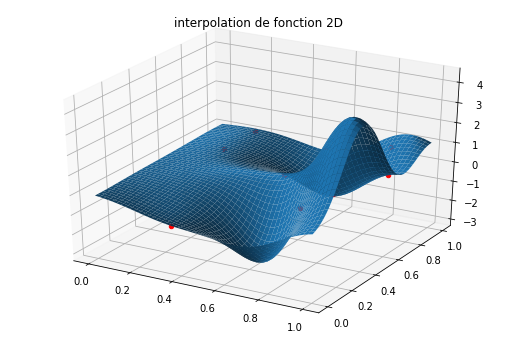

In [11]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,fX)
ax.scatter3D(y[:,0],y[:,1],c,c='r',depthshade=False)
plt.title("interpolation de fonction 2D")


<br>
<br>

### Interpolation relaxée

Dans certains cas, les contraintes d'interpolation peuvent s'avérer trop fortes pour la norme de Hilbert utilisée (typiquement lorsque le paramètre d'échelle $\sigma$ est grand par rapport aux positions des points d'interpolation). Numériquement ceci se traduit par une matrice d'interpolation très mal conditionnée. D'autre part les données d'observation peuvent etre bruitées, auquel cas une fonction passant exactement par les contraintes n'est plus désirable. Une solution consiste alors à écrire un problème d'interpolation relaxé ({\it smoothing spline interpolation}) : 

$$\text{Minimiser }\quad\lambda\left\|f\right\|_H^2+\sum_{i=1}^n(f(y_i)-c_i)^2,$$
où $\lambda>0$ est un paramètre à fixer. 

<br>

__Question 8__ : Montrer que la solution de l'interpolation inexacte s'obtient en rajoutant $\lambda$ aux coefficients diagonaux de la matrice du système linéaire.

<font color =blue> **Réponse 8 :** 
- On note $E$ l'énergie à minimiser i.e. $E: f \in H \mapsto \lambda ||f||_H^2+\sum_{i=1}^n(f(y_i)-c_i)^2$.
- La fonction $E$ est convexe et différentiable donc pour trouver son minimum, il suffit d'annuler son gradient.
- Puisque $E(f) = \lambda ||f||_H^2+\sum_{i=1}^n (\left\langle f,K_{y_i}\right\rangle_H-c_i)^2=\lambda ||f||_H^2+\sum_{i=1}^n (\left\langle f,K_{y_i}\right\rangle_H^2-2c_i\left\langle f,K_{y_i}\right\rangle_H+c_i^2)^2$ (grace à la propriété reproduisante) , alors $\nabla E(f) = 2 \lambda f + 2 \sum_{i=1}^n (\langle f,K_{y_i}\rangle_H -c_i) K_{y_i}=2 \lambda f + 2 \sum_{i=1}^n (f(y_i)-c_i)K_{y_i}$  où $K_{y_i}$ désigne $K_H(\cdot,y_i)$.
- Cela nous permet de calculer la solution:
$$ \nabla E(f) = 0 \Longleftrightarrow f = \frac{1}{\lambda} \sum_{i=1}^n (c_i - f(y_i)) K_{y_i} $$
- En particulier, on $\forall j \in [\![1,n]\!]$, $f(y_j)= \frac{1}{\lambda}\sum_{i=1}^n(c_i-f(y_i))K_H(y_i,y_j)$ i.e. <font color =red>$f(\textbf{y})=K_H(\textbf{y},\textbf{y})\textbf{a}$ </font>où $\textbf{a}=(a_1,..,a_n); \ a_i = \frac{1}{\lambda}(c_i - f(y_i)) $.
- Comme $\textbf{a} = \frac{1}{\lambda}(\textbf{c}-f(\textbf{y}))$ où $\textbf{c}=(c_1,...,c_n)$ alors <font color=red>$f(\textbf{y})= \textbf{c}-\lambda \textbf{a}$</font>. Par conséquent, <font color=red>$$(\lambda I_n + K_H(\textbf{y},\textbf{y}))\textbf{a} = \textbf{c}$$</font>
Ce qui montre que la solution de l'interpolation inexacte s'obtient en rajoutant $\lambda$ aux coefficients diagonaux de la matrice du système linéaire.

<br>

Modifier les fonctions précédentes pour prendre en compte ce nouveau modèle, et le tester sur les exemples précédents et sur l'exemple suivant :
```
y = np.linspace(0,1,30)[:,None]
c = np.cos(6*y) + .05*np.random.randn(30,1)
```
avec $h(u)=e^{-u^2/\sigma^2}$ et les jeux de paramètres suivants : $\sigma\in\{0.1,0.25\}, \lambda\in\{0,0.1\}$.

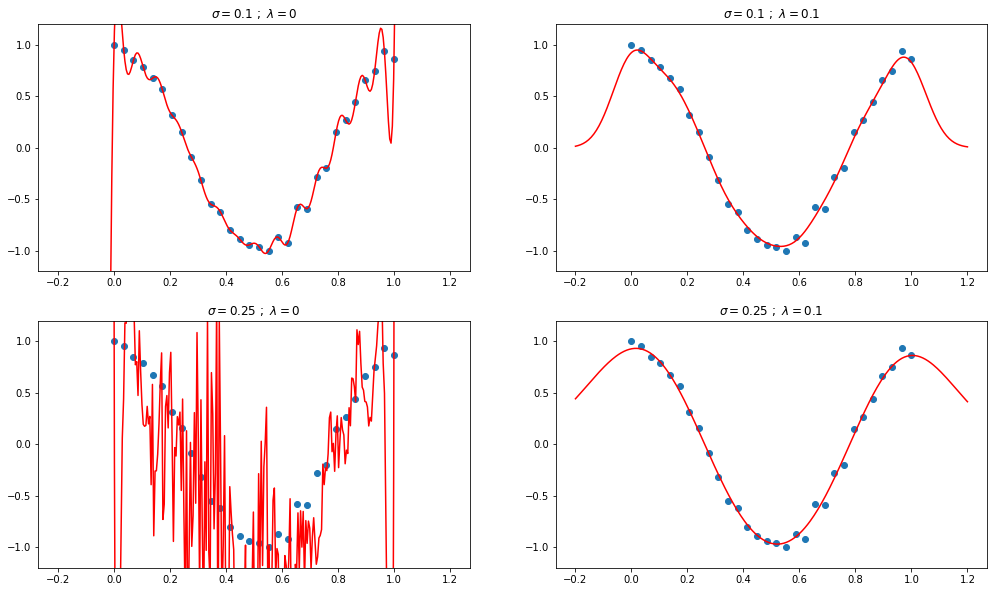

In [12]:
# redéfinition de Interp pour inclure le paramètre lambda
def Interp(x,y,c,h,l=0):
    Kyy = KernelMatrix(y, y, h)
    Kyy[np.diag_indices_from(Kyy)] += l
    a = np.linalg.solve(Kyy, c)
    Kxy = KernelMatrix(x, y, h)
    fx = Kxy @ a
    return fx

# tests pour différentes valeurs de sigma et de lambda
n = 30
y = np.linspace(0,1,n)[:,None]
c = np.cos(6*y) + .05*np.random.randn(n,1)
x = np.linspace(-0.2, 1.2, 300)[:,None]
fig, axs = plt.subplots(2, 2, figsize=(17, 10))
for i, s in enumerate([0.1, 0.25]):
    for j, l in enumerate([0, 0.1]):
        axs[i, j].plot(y, c, 'o')
        fx = Interp(x, y, c, gauss(s), l)
        axs[i,j].plot(x, fx, 'r')
        axs[i,j].set_title(fr"$\sigma={s} \ ;\  \lambda={l}$")
        axs[i,j].set_ylim(-1.2, 1.2)

<br>
<br>

### Problème d'interpolation vectorielle

On suppose à présent que $V$ est un espace de Hilbert de fonctions à valeurs vectorielles $v:{\mathbb R}^d\rightarrow{\mathbb R}^m$. 
S'il existe, le noyau reproduisant $K_V$ de l'espace $V$ est alors une application ${\mathbb R}^d\times{\mathbb R}^d\rightarrow\mathcal{M}_m({\mathbb R})$, définie par la relation: 

$$ \forall v\in V,\forall x\in{\mathbb R}^d,\forall \alpha\in{\mathbb R}^m,\quad\langle{v(x)},{\alpha}\rangle=\langle{K_V(\cdot,x)\alpha},v\rangle_V.$$

La propriété reproduisante s'écrit alors

$$ \forall x,y\in{\mathbb R}^d,\forall \alpha,\beta\in{\mathbb R}^m,\quad\left\langle {K_V(\cdot,x)\alpha},{K_V(\cdot,y)\beta}\right\rangle_V=\langle{K_V(x,y)\beta},{\alpha}\rangle.$$

On considère le problème exact d'interpolation vectorielle suivant: 

$$\text{Minimiser }\left\| v\right\|_V\text{ pour $v\in V$, sous les contraintes }v(y_i)=\gamma_i,$$

où $y_i\in{\mathbb R}^d, \gamma_i\in{\mathbb R}^m$ sont fixés, $1\leq i\leq n$. On considère aussi le problème inexact associé :

$$\text{Minimiser }\lambda\|v\|_V^2+\sum_{i=1}^n\|v(y_i)-\gamma_i\|^2,$$

__Question 9__ : Montrer que pour un noyau de la forme $K_V(x,y)=h(\|x-y\|)I_m$, les problèmes d'interpolation vectoriels exacts et inexacts sont équivalents à $m$ problèmes d'interpolation scalaires
avec le noyau scalaire $K_H(x,y)=h(\|x-y\|)$ (on supposera que ce noyau $K_H$ est bien le noyau reproduisant d'un espace de Hilbert $H$ de fonctions scalaires).

<font color=blue> **Réponse 9:**
- Commençons par le problème d'interpolation vectoriellle exacte:
\begin{equation}(\mathcal{P}_V^{exact}): \left\{ \begin{array}{ll}
& min_{v \in V} ||v||_V^2 \\
& \mbox{s.t. } v(y_i) = \gamma_i \ \forall i \in [\![1,n]\!]
\end{array} 
\right.
\end{equation} 
On écrit le Lagrangien du problème pour $v \in V$ et $\lambda \in \mathbb{R}^{m \times n}$:
$$ \mathcal{L}(v, \lambda) = \| v \|_V^2 + \sum_{i=1}^n \lambda_i^T (v(y_i) - \gamma_i) $$ où $\lambda_i$ désigne la $i^{\mbox{ème}}$ colonne de $\lambda$.\
En utilisant la propriété reproduisante, on a $$\mathcal{L}(v, \lambda) = \| v \|_V^2 + \sum_{i=1}^n (\left\langle K_V(\cdot,y_i)\lambda_i , v \right\rangle_V - \lambda_i^T\gamma_i)$$
On calcule alors le gradient du Lagrangien en $v$ :
$$ \frac{\partial \mathcal{L}}{\partial v}(v, \lambda)= 2v + \sum_{i=1}^n K_V(\cdot, y_i) \lambda_i = 0 $$
Par conséquent, $$\frac{\partial \mathcal{L}}{\partial v}(v, \lambda)=0 \Longleftrightarrow v=-\frac{1}{2} \sum_{i=1}^nK_V(\cdot,y_i)\lambda_i$$
Il existe alors des vecteurs $a_i = - \frac{\lambda_i}{2}$ tel que :
$$ v^* = \sum_{i=1}^n K_V(\cdot, y_i) a_i $$
On reprend alors la contrainte du problème qui nous donne :
\begin{equation}
\forall j \in [\![1,n]\!], \ \  v(y_j) = \sum_{i=1}^n K_V(y_i, y_j) a_i= \gamma_i
\end{equation}
On rappelle l'expression du noyau :
$$ \forall \ u,v \in \mathbb{R}^d, \ \ K_V(u,v) = h(\|u-v\|) I_m $$
c'est-à-dire $K_V(y_i,y_j) = h(||y_i-y_j||)I_m= K_H(y_i,y_j)I_m$ avec $K_H:(t,t') \in \mathbb{R}^d \times \mathbb{R}^d \mapsto h(||t-t')$ est un noyau semi-défini positive et $H$ muni du produit scalaire $\left\langle\ , \ \right\rangle_H : (f,g) \in H^2 \mapsto \left\langle f I_m, g I_m\right\rangle_V$ est  le RKHS associé.\
On note $v(u)=(v_1(u),...,v_m(u))$ pour $u \in \mathbb{R}^d$.\
Ainsi, $$\forall j \in [\![1,m]\!], \ \ v(y_j) = \sum_{i=1}^nK_H(y_i,y_j)I_m a_i = \sum_{i=1}^n K_H(y_i,y_j)a_i $$ i.e. $v_k(y_j) = \sum_{i=1}^n K_H(y_i,y_j)[a_i]_k = [K_H(y,y)a^{(k)}]_j$ $\forall k \in [\![1,m]\!]$ où $a=(a_1,...,a_n) \in \mathbb{R}^{m\times n}$ la matrices de colonnes $a_i$ et où $a^{(k)} \in \mathbb{R}^n$ désigne la $k^{eme}$ ligne de la matrice $a$.\
Notons $\gamma=(\gamma_1,..,\gamma_n) \in \mathbb{R}^{m \times n}$ la matrice de colonnes $\gamma_i$ et notons $\gamma^{(k)}$ la $k^{eme}$ ligne de $\gamma$.
En d'autres termes, $$\forall k \in [\![1,m]\!], \ \ \gamma^{(k)} = v_k(y)=K_H(y,y)a^{(k)}$$
Ainsi, <font color=red>$v$ est solution de $(\mathcal{P}_V^{exact}) \Longleftrightarrow \ \forall k \in [\![1,m]\!], v_k $ est solution de $(\mathcal{P}_{H,k}^{exact})$ </font>
où \begin{equation}(\mathcal{P}_{H,k}^{exact}): \left\{ \begin{array}{ll}
& min_{f \in H} ||f||_H \\
& \mbox{s.t. } f(y_i) = \gamma_{k,i} = \gamma^{(k)}_i \ \ \ \forall i \in [\![1,n]\!]
\end{array} 
\right.
\end{equation} **NB:** En vrai, on a démontré le sens direct. Mais comme le sens indirect est trivial , on a l'équivalence.
- On passe maintenant au problème d'interpolation vectorielle inexacte.
\begin{equation}(\mathcal{P}_V^{inexact}):  min_{v \in V} \lambda ||v||_V^2+ \sum_{i=1}^n||v(y_i)-\gamma_i||^2
\end{equation}
où $||\cdot||$ désigne la norme euclidienne sur $\mathbb{R}^d$.    
Notons $E: v \in V \mapsto \lambda ||v||_V^2+ \sum_{i=1}^n||v(y_i)-\gamma_i||^2$ l'énergie à minimiser. Cette fonction est convexe et différentiable.\
On a $$||v(y_i)-\gamma_i||^2= \langle v(y_i), v(y_i) \rangle - 2\langle v(y_i),\gamma_i\rangle + ||\gamma_i||^2
= \langle K_V(\cdot,y_i) v(y_i), v \rangle_V -2 \langle K_V(\cdot,y_i) \gamma_i, v \rangle_V + ||\gamma_i||^2 $$ 
Ainsi,$$\nabla E(v)= 2\lambda v + 2 \sum_{i=1}^n K_V(\cdot,y_i)(v(y_i)-\gamma_i)$$
Donc, $\nabla E(v)=0 \Longleftrightarrow v = \frac{1}{\lambda}\sum_{i=1}^n K_V(\cdot,y_i)(\gamma_i-v(y_i))$ et par conséquent,$$v(y_j)= \frac{1}{\lambda}\sum_{i=1}K_V(y_i,y_j)(\gamma_i-v(y_i)) = \frac{1}{\lambda}\sum_{i=1}^nK_H(y_i,y_j)(\gamma_i-v(y_i))$$
Donc, $v_k(y_j) = \frac{1}{\lambda}\sum_{i=1}^nK_H(y_i,y_j)(\gamma_{k,i}-v_k(y_i))$  $\forall k \in [\![1,m]\!]$.\
Si on pose $a_i = \frac{1}{\lambda}(\gamma_i - v(y_i)) \in \mathbb{R}^m$ pour $1\leq i \leq n$ , $a \in \mathbb{R}^{m \times n}$ la matrice dont les colonnes sont les $a_i$ et $a^{(k)}$ la $k^{eme}$ ligne de $a$, alors on obtient $v_k(y)=K_H(y,y)a^{(k)}$ et $a^{(k)} = \frac{1}{\lambda}(\gamma^{(k)}-v_k(y))$, ce qui donne finalement $(\lambda I_m+K_H(y,y))a^{(k)}= \gamma^{(k)}$.    
Ainsi, <font color=red>$v$ est solution de $(\mathcal{P}_V^{inexact}) \Longleftrightarrow \ \forall k \in [\![1,m]\!], v_k $ est solution de $(\mathcal{P}_{H,k}^{inexact})$ </font>
où \begin{equation}(\mathcal{P}_{H,k}^{inexact}):  min_{f \in H} \lambda||f||_H^2+ \sum_{i=1}^n \left(f(y_i)-\gamma^{(k)}_i\right)^2
\end{equation} **NB:**De nouveau, j'ai démontré seulement le sens direct; la réciproque est facile à  vérifier.
- On déduit que <font color=red>les problèmes d'interpolation vectoriels exacts et inexacts sont équivalents à $m$ problèmes d'interpolation scalaires sur les $m$ composantes.</font>



<br>

Si besoin, modifier la fonction `Interp` pour qu'elle puisse aussi résoudre les problèmes d'interpolation vectorielle.

<br>

__Question 10__ : Tester la fonction {\sf Interp} avec $d=m=2$: générer des points $y_i$ dans $[0,1]^2$ (commencer avec $n=3$), des vecteurs $\gamma_i$ avec la commande {\sf gamma = 0.05*np.random.randn(n,d)}, puis évaluer sur une grille uniforme de taille 20*20. Afficher le champ de vecteurs obtenu avec la fonction {\sf quiver} de Matplotlib.

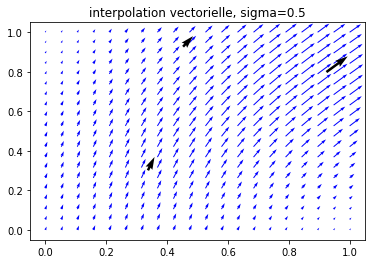

In [13]:
def InterpGrid2D(X1,X2,y,c,h,l=0) :
    # modification de InterpGrid devant renvoyer un interpolant vectoriel et non scalaire
    x = np.column_stack((X1.flatten(), X2.flatten()))
    fx = Interp(x, y, c, h, l)
    return fx.reshape(*X1.shape, -1).transpose(2, 0, 1)
             
n = 3
d = 2
m = 2
sigma = .5
y = np.random.rand(n,d)
gamma = 0.05*np.random.randn(n,m)
t = np.linspace(0,1,20)
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma))
plt.title("interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X1,X2,V1,V2,color='b')
plt.quiver(y[:,0],y[:,1],gamma[:,0],gamma[:,1]);


<br>
<br>

## Appariement de points labellisés

### Appariement linéaire

Le problème d'interpolation vectorielle précédent, pour $d=m$, peut etre vu comme un problème d'appariement de points. Pour la version "exacte", ceci s'écrit :
$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

On se ramène simplement au problème précédent en posant $\gamma_i=z_i-y_i$.

<br>

__Question 11__ : On se place dans le plan ($d=m=2$). Reprendre l'exemple de la question précédente, en affichant cette fois dans un meme graphique les points $y_i$ et $z_i$ et visualiser la solution $\phi$ en calculant et en affichant le déplacement d'une grille de points.

In [14]:
from matplotlib.collections import LineCollection

def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))

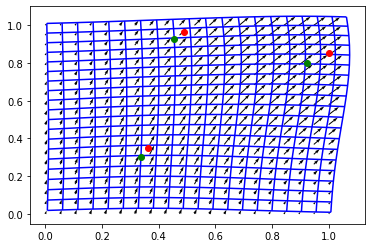

In [15]:
plt.quiver(X1,X2,V1,V2,color='black')
Y1, Y2 = X1+V1, X2+V2
plot_grid(Y1, Y2, color='b')
plt.plot(y[:,0], y[:,1], 'o', color='g')
z = y + gamma
plt.plot(z[:,0], z[:,1], 'o', color='r')

<br>

__Question 12__ : Charger le fichiers `hand1.mat` et `hand2.mat` avec les commandes :

In [17]:
import scipy.io
C1 = scipy.io.loadmat('hand1.mat')['C1']
C2 = scipy.io.loadmat('hand2.mat')['C2']

Les tableaux `C1` et `C2` 
contiennent les coordonnées de deux contours de mains. Avec le code suivant, sélectionner des points de référence (extrémités des doigts, etc.) pour chacun :

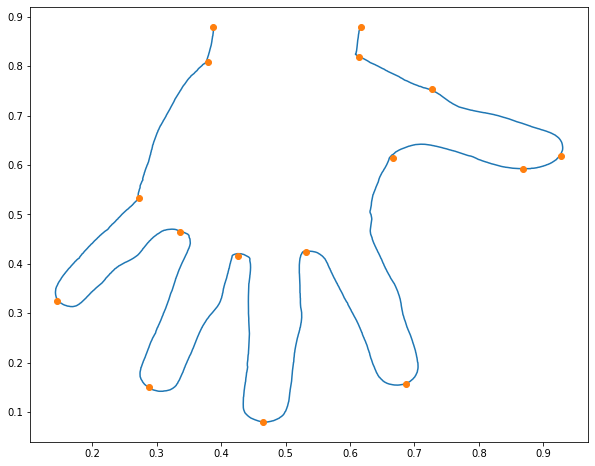

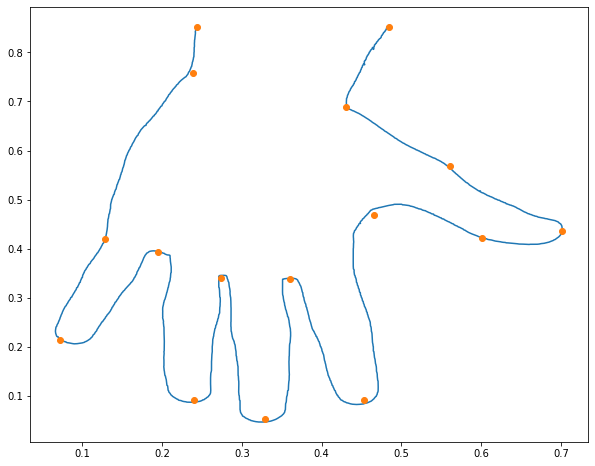

In [19]:
%matplotlib tk
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(C1[:,0],C1[:,1])
y = np.array(plt.ginput(0))
plt.plot(y[:,0],y[:,1],'o')
plt.show()
plt.figure()
plt.plot(C2[:,0],C2[:,1])
z = np.array(plt.ginput(0))
plt.plot(z[:,0],z[:,1],'o')
plt.show()

<br>

Réaliser l'appariement des deux ensembles de points puis afficher sur un meme graphique la courbe $C_2$ et ses points de reference, la courbe transformée $\phi(C_1)$ et le déplacement d'une grille de points.`

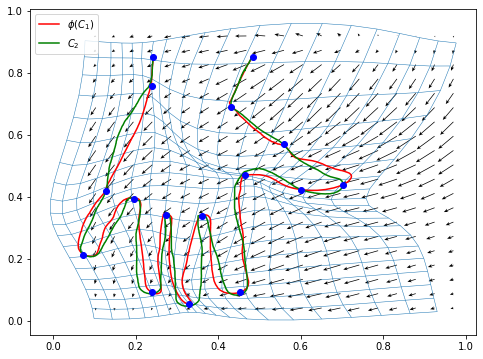

In [20]:
%matplotlib inline
# visualisation sous forme de champs de veteur
gamma = z - y
n = 20
sigma = 0.24
h = gauss(sigma)
x0, y0 = C1.min(0)
x1, y1 = C1.max(0)
dx, dy = 0.05*(x1-x0), 0.05*(y1-y0)
X1, X2 = np.meshgrid(np.linspace(x0-dx, x1+dx, n), np.linspace(y0-dx, y1+dx, n))
V1, V2 = InterpGrid2D(X1, X2, y, gamma, h)
Y1, Y2 = X1+V1, X2+V2
phiC1 = C1 + Interp(C1, y, gamma, h) 
 
plt.figure(figsize=(8, 6))
plot_grid(Y1, Y2, linewidth=0.5)
plt.plot(phiC1[:,0], phiC1[:,1], 'r', label=r"$\phi(C_1)$")
plt.plot(C2[:,0], C2[:,1], 'g', label=r"$C_2$")
plt.plot(z[:,0], z[:,1], 'o', color='b')
plt.quiver(X1, X2, V1, V2, width=0.0016, headwidth=5, headlength=6)
plt.legend()

<br>
<br>

## Ajout des déplacements affines et modèle Thin Plate Splines

Il est possible d'ajouter au modèle les déplacements affines. Le problème d'appariement exact devient alors:

$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)+Bx+c
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

où $B$ est une matrice carrée de taille $d$ et $c$ un vecteur. On peut montrer que le champ de vecteur optimal s'écrit toujours comme une combinaison linéaire des noyaux $K_V(\cdot,y_i)$.

<br>

__Question 13__ : Trouver le système linéaire à résoudre pour obtenir les coefficients des vecteurs $\alpha_i$, $c$, et de la matrice $B$, puis implémenter cet appariement. Reprendre l'exemple des contours de mains avec ce nouveau modèle. 

<font color = blue> **Réponse13:**
Il s'agit de trouver $v$, $B$ et $c$. Puis à partir de ces derniers paramètres, la fonction $\phi$ est entièrement déterminée. Le problème d'optimization est :
\begin{equation}
(\mathcal{P}_V): \left\{ \begin{array}{ll}
& min_{v,B,c} ||v||_V^2 \\
& v(y_i) = \gamma'_i \ \ \forall i \in [\![1,n]\!]
\end{array}
\right.
\end{equation}
avec $\gamma_i = z_i-y_i \in \mathbb{R}^d$ et $\gamma'_i = \gamma_i - By_i-c \ \in \mathbb{R}^d$.
On considère le Lagrangian associé au problème : 
$$\mathcal{L}(v,B,c,\lambda) = ||v||_V^2+\sum_{i=1}^n \lambda_i^T(v(y_i)+By_i+c-\gamma_i)$$ pour $v \in V$, $c \in \mathbb{R}^d$ , $B \in \mathbb{R}^{ d \times d}$ et $ \lambda = (\lambda_1,..,\lambda_n) \in \mathbb{R}^{d \times n}$ (chaque $\lambda_i \in \mathbb{R}^d$)   
Calculons maintenant le gradient du lagrangien:
$$\frac{\partial \mathcal{L}}{\partial v}(v,c,B,\lambda) = 2v+\sum_{i=1}^n K_V(\cdot,y_i)\lambda_i$$
$$\frac{\partial \mathcal{L}}{\partial c}(v,c,B,\lambda) = \sum_{i=1}^n \lambda_i$$
$$\frac{\partial \mathcal{L}}{\partial B}(v,c,B,\lambda) = \sum_{i=1}^n \frac{\partial (\lambda_i^TBy_i)}{\partial B}= \sum_{i=1}^n \frac{\partial (tr(By_i\lambda_i^T)}{\partial B} = \sum_{i=1}^n \lambda_i y_i^T$$
où on a utilisé $\frac{\partial \ tr(BA)}{\partial B} = A^T$.   
En annulant les dérivées calculées et en utilisant les résultats des questions précédents, on a <font color=green>$v = \sum_{i=1}^n K_V(\cdot,y_i)a_i $ </font>( avec $a_i=-\lambda_i/2$) , <font color=brown>$\sum_{i=1}^na_i = 0$</font> et <font color=purple>$\sum_{i=1}^n a_i y_i^T=0$.</font>   
On utilise les notations des questions précédentes : $y=(y_1,..,y_n) \in \mathbb{R}^{d \times n}$, $\gamma=(\gamma_1,..,\gamma_n) \in \mathbb{R}^{d \times n}$ et $a=(a_1,..,a_n) \in \mathbb{R}^{d \times n}$.    
Avec l'hypothèse $K_V(u,v) = K_H(u,v)I_m \ \forall u,v \in \mathbb{R}^d$ et en utilisant les résultats des questions précédentes, on a <font color=green>$v_k(y) = K_H(y,y)a^{(k)}=\gamma'^{(k)}$ </font> pour tout $1\leq k \leq d$ où $\gamma'= \gamma -By-c \mathbf{1}_n^T $ et donc <font color=blue>$\gamma'^{(k)} = \gamma^{(k)} - y^T B^{(k)}-c_k \mathbf{1}_n$</font>.
De plus, on a <font color=brown>$a \mathbf{1}_n=0$</font> et <font color=purple>$a\ y^T=0$</font> i.e. $\forall k \in [\![1,d]\!]$, on a <font color=brown>$\mathbf{1}_n^T a^{(k)}=0$</font> et <font color=purple>$y \ a^{(k)}=0$</font> (car la $k^{eme}$ ligne du produit matriciel $UW$ est $W^TU^{(k)}$).    
On a alors, en notant $K:=K_H(y,y)$, $$\forall k, \ \ \ \ a^{(k)}= K^{-1} \gamma'^{(k)} = K^{-1} \gamma^{(k)} - K^{-1} y^TB^{(k)} - c_k K^{-1} \mathbf{1}= K^{-1} \gamma^{(k)} - K^{-1} (y^TB^{(k)} + c_k \mathbf{1}_n)$$

$$\Longrightarrow \forall k, \ \ \ \ \left\{ \begin{array}{ll}
& \mathbf{1}_n^Ta^{(k)}= \mathbf{1}_n^TK^{-1} \gamma^{(k)} - \mathbf{1}_n^TK^{-1} (y^TB^{(k)} + c_k \mathbf{1}_n) \\
&y a^{(k)}= yK^{-1} \gamma^{(k)} - yK^{-1} (y^TB^{(k)} + c_k \mathbf{1}_n)\\
\end{array}
\right.$$

$$\Longrightarrow \forall k, \ \ \left\{ \begin{array}{ll}
&\mathbf{1}_n^TK^{-1} \gamma^{(k)} = \mathbf{1}_n^TK^{-1} (y^TB^{(k)} + c_k \mathbf{1}_n) \\
&yK^{-1} \gamma^{(k)} = yK^{-1} (y^TB^{(k)} + c_k \mathbf{1}_n)\\
\end{array}
\right.$$

<font color = red>$$\Longrightarrow \left\{ \begin{array}{ll}
&\gamma K^{-1} \mathbf{1}_n = (By+c\mathbf{1}_n^T)K^{-1}\mathbf{1}_n\\
&\gamma K^{-1} y^T = (By+c\mathbf{1}_n^T)K^{-1}y^T\
\end{array}
\right. $$</font>

**NB:** Si $K_H(y,y)$ n'est pas inversible, on remplace l'inverse par la pseudo-inverse.

In [21]:
def thin_plate_spline(y, z, h, l=0):
    n, d = y.shape
    Kyy = KernelMatrix(y, y, h)
    Kyy[np.diag_indices_from(Kyy)] += l
    inv_K = np.linalg.inv(Kyy)
    gamma = z-y

    # dimension of the space of parameters (B, c)
    bc_dim = d*(d+1)
    B_ind = np.arange(d, bc_dim)
    c_ind = np.arange(d)
    # System matrix: M @ Bc = w
    M = np.zeros((bc_dim, bc_dim))
    w = np.zeros(bc_dim)
    # First equation
    slik = inv_K.sum(0).reshape(n,1) # sum over lines
    sky = (slik*y).sum(0) # ponderated sum of y's
    w[:d] = (slik*gamma).sum(0)
    M[c_ind, c_ind] = slik.sum()
    M[c_ind.repeat(d), B_ind] = np.tile(sky, d)
    # Second equation
    w[d:] = (inv_K[:,:,None,None] * gamma[None,:,:,None] * y[:,None,None,:]).sum((0,1)).flatten()
    M[B_ind, c_ind.repeat(d)] = np.tile(sky, d)
    i = B_ind.reshape(d, d).repeat(d, 0).flatten()
    j = B_ind.repeat(d)
    M[i, j] = np.tile((inv_K[:,:,None,None] * y[None,:,:,None] * y[:,None,None,:]).sum((0,1)).flatten(), d)

    # Solve
    Bc = np.linalg.solve(M, w)
    c = Bc[:d]
    B = Bc[d:].reshape(d, d)
    gamma2 = gamma - (B @ y[:,:,None])[:,:,0] - c
    a = inv_K @ gamma2

    # Check that everything works
    # print((inv_K[:,:,None] * (c - gamma + (B@y[:,:,None])[:,:,0])).sum((0,1)))
    # print((inv_K[:,:,None,None] * ((c[:,None] - gamma[:,:,None] + B@y[:,:,None]) @ y[:,None,None,:])).sum((0,1)))
    # print(np.trace(a.T @ Kyy @ a))
    return a, B, c  

def interp_TPS(x, y, a, B, c, h):
    K = KernelMatrix(x, y, h)
    z = x + K @ a + (B @ x[:,:,None])[:,:,0] + c
    return z

def interpGrid_TPS(X1, X2, y, a, B, c, h):
    x = np.column_stack((X1.flatten(), X2.flatten()))
    fx = interp_TPS(x, y, a, B, c, h)
    return fx.reshape(*X1.shape, -1).transpose(2, 0, 1)

<br>

__Question 14__ : Tester à présent ce nouveau modèle avec le noyau $h(r)=r^2\log(r)$. Ce noyau n'est pas de type positif mais semi-positif, et n'est utilisable qu'en incluant les transformations affines. C'est le modèle de spline "plaque mince" (TPS: Thin Plate Splines).

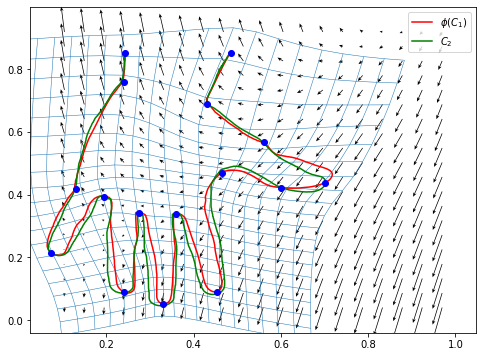

In [22]:
h = lambda r: r**2 * np.log(r+1e-15)
a, B, c = thin_plate_spline(y, z, h)
Y1, Y2 = interpGrid_TPS(X1, X2, y, a, B, c, h)
phiC1 = interp_TPS(C1, y, a, B, c, h)

plt.figure(figsize=(8, 6))
plot_grid(Y1, Y2, linewidth=0.5)
plt.plot(phiC1[:,0], phiC1[:,1], 'r', label=r"$\phi(C_1)$")
plt.plot(C2[:,0], C2[:,1], 'g', label=r"$C_2$")
plt.plot(z[:,0], z[:,1], 'o', color='b')
plt.quiver(X1, X2, Y1-X1, Y2-X1, width=0.0016, headwidth=5, headlength=6)
plt.xlim(x0-3*dx, x1+3*dx)
plt.ylim(y0-3*dy, y1+3*dy)
plt.legend()